# Orders

In [1]:
import pandas as pd
import numpy as np

orders = pd.read_csv('Orders.csv')
pd.set_option('display.max_columns', None)  # 不隐藏列
orders.head()

ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE       SHIP_MODE CUSTOMER_ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

        PRODUCT_ID     SALES  QUANTITY  DISCOUNT    PROFIT  
0  FUR-BO-10001798  261.9600         2      0.00   41.9136  
1  FUR-CH-10000454  731.9400         3      0.00  219.5820  
2  OFF-LA-10000240   14.6200         2      0.00    6.8714  
3  FUR-TA-10000577  957.5775         5      0.45 -383.0310  
4  OFF-ST-10000760   22.3680         2      0.20    2.5164

In [2]:
orders['DISCOUNTED_PRICE'] = orders['SALES']/orders['QUANTITY']
orders['PRICE'] = orders['DISCOUNTED_PRICE']/(1-orders['DISCOUNT'])
orders.head()

ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE       SHIP_MODE CUSTOMER_ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

        PRODUCT_ID     SALES  QUANTITY  DISCOUNT    PROFIT  DISCOUNTED_PRICE  \
0  FUR-BO-10001798  261.9600         2      0.00   41.9136          130.9800   
1  FUR-CH-10000454  731.9400         3      0.00  219.5820          243.9800   
2  OFF-LA-10000240   14.6200         2      0.00    6.8714            7.3100   
3  FUR-TA-10000577  957.5775         5      0.45 -383.0310          191.5155   
4  OFF-ST-10000760   22.3680         2      0.20    2.5164           11.1840   

    PRICE  
0  130.98  
1  243.98  
2    7.31  
3  348.21  
4   13.98

In [4]:
# price is consistent
orders[orders['PRODUCT_ID'] == 'FUR-BO-10000362']

ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE       SHIP_MODE  \
1594    1595  CA-2015-118423   3/24/2015   3/27/2015     First Class   
1610    1611  CA-2014-156349   5/26/2014   5/30/2014  Standard Class   
2603    2604  CA-2016-165848    6/4/2016    6/4/2016        Same Day   
5394    5395  US-2014-123183  11/19/2014  11/25/2014  Standard Class   
7680    7681  CA-2014-133592  12/31/2014    1/7/2015  Standard Class   

     CUSTOMER_ID       PRODUCT_ID     SALES  QUANTITY  DISCOUNT    PROFIT  \
1594    DP-13390  FUR-BO-10000362   359.058         3      0.30  -35.9058   
1610    ML-17395  FUR-BO-10000362   290.666         2      0.15   27.3568   
2603    EN-13780  FUR-BO-10000362   136.784         1      0.20    5.1294   
5394    GR-14560  FUR-BO-10000362  1025.880         6      0.00  235.9524   
7680    KM-16375  FUR-BO-10000362   341.960         2      0.00   78.6508   

      DISCOUNTED_PRICE   PRICE  
1594           119.686  170.98  
1610           145.333  170.98  
2603           136.784  170.98  
5394           170.980  170.98  
7680           170.980  170.98

# Products

In [5]:
products = pd.read_csv('Product.csv')
products.head()

ID             NAME   CATEGORY  \
0  FUR-BO-10001798        Furniture  Bookcases   
1  FUR-CH-10000454        Furniture     Chairs   
2  OFF-LA-10000240  Office Supplies     Labels   
3  FUR-TA-10000577        Furniture     Tables   
4  OFF-ST-10000760  Office Supplies    Storage   

                                         SUBCATEGORY  
0                  Bush Somerset Collection Bookcase  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  
2  Self-Adhesive Address Labels for Typewriters b...  
3      Bretford CR4500 Series Slim Rectangular Table  
4                      Eldon Fold N Roll Cart System

In [6]:
products.rename(columns = {'ID':'PRODUCT_ID', 
                           'NAME':'CATEGORY', 
                           'CATEGORY':'SUBCATEGORY', 
                           'SUBCATEGORY':'PRODUCT_NAME'}, inplace=True)
products.head()

PRODUCT_ID         CATEGORY SUBCATEGORY  \
0  FUR-BO-10001798        Furniture   Bookcases   
1  FUR-CH-10000454        Furniture      Chairs   
2  OFF-LA-10000240  Office Supplies      Labels   
3  FUR-TA-10000577        Furniture      Tables   
4  OFF-ST-10000760  Office Supplies     Storage   

                                        PRODUCT_NAME  
0                  Bush Somerset Collection Bookcase  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  
2  Self-Adhesive Address Labels for Typewriters b...  
3      Bretford CR4500 Series Slim Rectangular Table  
4                      Eldon Fold N Roll Cart System

# Customers

In [7]:
customers = pd.read_csv('Customer.csv')
customers.head()

ID             NAME    SEGMENT        COUNTRY             CITY  \
0  CG-12520      Claire Gute   Consumer  United States        Henderson   
1  DV-13045  Darrin Van Huff  Corporate  United States      Los Angeles   
2  SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale   
3  BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles   
4  AA-10480     Andrew Allen   Consumer  United States          Concord   

            STATE  POSTAL_CODE REGION  
0        Kentucky        42420  South  
1      California        90036   West  
2         Florida        33311  South  
3      California        90032   West  
4  North Carolina        28027  South

In [8]:
customers.rename(columns = {'ID':'CUSTOMER_ID', 
                           'NAME':'CUSTOMER_NAME'}, inplace=True)
customers.head()

CUSTOMER_ID    CUSTOMER_NAME    SEGMENT        COUNTRY             CITY  \
0    CG-12520      Claire Gute   Consumer  United States        Henderson   
1    DV-13045  Darrin Van Huff  Corporate  United States      Los Angeles   
2    SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale   
3    BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles   
4    AA-10480     Andrew Allen   Consumer  United States          Concord   

            STATE  POSTAL_CODE REGION  
0        Kentucky        42420  South  
1      California        90036   West  
2         Florida        33311  South  
3      California        90032   West  
4  North Carolina        28027  South

# Join

In [9]:
data = orders.merge(products, how = 'left', on = 'PRODUCT_ID')
data.head()

ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE       SHIP_MODE CUSTOMER_ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

        PRODUCT_ID     SALES  QUANTITY  DISCOUNT    PROFIT  DISCOUNTED_PRICE  \
0  FUR-BO-10001798  261.9600         2      0.00   41.9136          130.9800   
1  FUR-CH-10000454  731.9400         3      0.00  219.5820          243.9800   
2  OFF-LA-10000240   14.6200         2      0.00    6.8714            7.3100   
3  FUR-TA-10000577  957.5775         5      0.45 -383.0310          191.5155   
4  OFF-ST-10000760   22.3680         2      0.20    2.5164           11.1840   

    PRICE         CATEGORY SUBCATEGORY  \
0  130.98        Furniture   Bookcases   
1  243.98        Furniture      Chairs   
2    7.31  Office Supplies      Labels   
3  348.21        Furniture      Tables   
4   13.98  Office Supplies     Storage   

                                        PRODUCT_NAME  
0                  Bush Somerset Collection Bookcase  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  
2  Self-Adhesive Address Labels for Typewriters b...  
3      Bretford CR4500 Series Slim Rectangular Table  
4                      Eldon Fold N Roll Cart System

In [10]:
data = data.merge(customers, how = 'left', on = 'CUSTOMER_ID')
data.head()

ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE       SHIP_MODE CUSTOMER_ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

        PRODUCT_ID     SALES  QUANTITY  DISCOUNT    PROFIT  DISCOUNTED_PRICE  \
0  FUR-BO-10001798  261.9600         2      0.00   41.9136          130.9800   
1  FUR-CH-10000454  731.9400         3      0.00  219.5820          243.9800   
2  OFF-LA-10000240   14.6200         2      0.00    6.8714            7.3100   
3  FUR-TA-10000577  957.5775         5      0.45 -383.0310          191.5155   
4  OFF-ST-10000760   22.3680         2      0.20    2.5164           11.1840   

    PRICE         CATEGORY SUBCATEGORY  \
0  130.98        Furniture   Bookcases   
1  243.98        Furniture      Chairs   
2    7.31  Office Supplies      Labels   
3  348.21        Furniture      Tables   
4   13.98  Office Supplies     Storage   

                                        PRODUCT_NAME    CUSTOMER_NAME  \
0                  Bush Somerset Collection Bookcase      Claire Gute   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Claire Gute   
2  Self-Adhesive Address Labels for Typewriters b...  Darrin Van Huff   
3      Bretford CR4500 Series Slim Rectangular Table   Sean O'Donnell   
4                      Eldon Fold N Roll Cart System   Sean O'Donnell   

     SEGMENT        COUNTRY             CITY       STATE  POSTAL_CODE REGION  
0   Consumer  United States        Henderson    Kentucky        42420  South  
1   Consumer  United States        Henderson    Kentucky        42420  South  
2  Corporate  United States      Los Angeles  California        90036   West  
3   Consumer  United States  Fort Lauderdale     Florida        33311  South  
4   Consumer  United States  Fort Lauderdale     Florida        33311  South

In [11]:
data.isna().sum()

ROW_ID              0
ORDER_ID            0
ORDER_DATE          0
SHIP_DATE           0
SHIP_MODE           0
CUSTOMER_ID         0
PRODUCT_ID          0
SALES               0
QUANTITY            0
DISCOUNT            0
PROFIT              0
DISCOUNTED_PRICE    0
PRICE               0
CATEGORY            0
SUBCATEGORY         0
PRODUCT_NAME        0
CUSTOMER_NAME       0
SEGMENT             0
COUNTRY             0
CITY                0
STATE               0
POSTAL_CODE         0
REGION              0
dtype: int64

In [12]:
line_data = data.groupby([pd.Grouper('DISCOUNT')]).agg(SUM_QUANTITY=('QUANTITY','sum'))
line_data.head()

SUM_QUANTITY
DISCOUNT              
0.00             18267
0.10               373
0.15               198
0.20             13660
0.30               849

In [13]:
line_data = line_data.reset_index()
line_data.head()

DISCOUNT  SUM_QUANTITY
0      0.00         18267
1      0.10           373
2      0.15           198
3      0.20         13660
4      0.30           849

In [14]:
import plotly.express as px

fig = px.line(line_data, x="DISCOUNT", y="SUM_QUANTITY")

fig.update_layout(
    title = 'The Influence of Discount on Quantity',
    template = 'plotly' 
)

fig.show()

# Modelling

In [15]:
dummies = pd.get_dummies(data, columns=['SHIP_MODE', 'SUBCATEGORY', 'SEGMENT', 'STATE'], drop_first = True)
dummies.head()

ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE CUSTOMER_ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015    SO-20335   

        PRODUCT_ID     SALES  QUANTITY  DISCOUNT    PROFIT  DISCOUNTED_PRICE  \
0  FUR-BO-10001798  261.9600         2      0.00   41.9136          130.9800   
1  FUR-CH-10000454  731.9400         3      0.00  219.5820          243.9800   
2  OFF-LA-10000240   14.6200         2      0.00    6.8714            7.3100   
3  FUR-TA-10000577  957.5775         5      0.45 -383.0310          191.5155   
4  OFF-ST-10000760   22.3680         2      0.20    2.5164           11.1840   

    PRICE         CATEGORY                                       PRODUCT_NAME  \
0  130.98        Furniture                  Bush Somerset Collection Bookcase   
1  243.98        Furniture  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
2    7.31  Office Supplies  Self-Adhesive Address Labels for Typewriters b...   
3  348.21        Furniture      Bretford CR4500 Series Slim Rectangular Table   
4   13.98  Office Supplies                      Eldon Fold N Roll Cart System   

     CUSTOMER_NAME        COUNTRY             CITY  POSTAL_CODE REGION  \
0      Claire Gute  United States        Henderson        42420  South   
1      Claire Gute  United States        Henderson        42420  South   
2  Darrin Van Huff  United States      Los Angeles        90036   West   
3   Sean O'Donnell  United States  Fort Lauderdale        33311  South   
4   Sean O'Donnell  United States  Fort Lauderdale        33311  South   

   SHIP_MODE_Same Day  SHIP_MODE_Second Class  SHIP_MODE_Standard Class  \
0                   0                       1                         0   
1                   0                       1                         0   
2                   0                       1                         0   
3                   0                       0                         1   
4                   0                       0                         1   

   SUBCATEGORY_Appliances  SUBCATEGORY_Art  SUBCATEGORY_Binders  \
0                       0                0                    0   
1                       0                0                    0   
2                       0                0                    0   
3                       0                0                    0   
4                       0                0                    0   

   SUBCATEGORY_Bookcases  SUBCATEGORY_Chairs  SUBCATEGORY_Copiers  \
0                      1                   0                    0   
1                      0                   1                    0   
2                      0                   0                    0   
3                      0                   0                    0   
4                      0                   0                    0   

   SUBCATEGORY_Envelopes  SUBCATEGORY_Fasteners  SUBCATEGORY_Furnishings  \
0                      0                      0                        0   
1                      0                      0                        0   
2                      0                      0                        0   
3                      0                      0                        0   
4                      0                      0                        0   

   SUBCATEGORY_Labels  SUBCATEGORY_Machines  SUBCATEGORY_Paper  \
0                   0                     0                  0   
1                   0                     0                  0   
2                   1                     0                  0   
3                   0                     0                  0   
4                   0                     0                  0   

   SUBCATEGORY_Phones  SUBCATEGORY_Storage  SUBCATEGORY_Supplies  \
0       

In [16]:
dummies.columns

Index(['ROW_ID', 'ORDER_ID', 'ORDER_DATE', 'SHIP_DATE', 'CUSTOMER_ID',
       'PRODUCT_ID', 'SALES', 'QUANTITY', 'DISCOUNT', 'PROFIT',
       'DISCOUNTED_PRICE', 'PRICE', 'CATEGORY', 'PRODUCT_NAME',
       'CUSTOMER_NAME', 'COUNTRY', 'CITY', 'POSTAL_CODE', 'REGION',
       'SHIP_MODE_Same Day', 'SHIP_MODE_Second Class',
       'SHIP_MODE_Standard Class', 'SUBCATEGORY_Appliances', 'SUBCATEGORY_Art',
       'SUBCATEGORY_Binders', 'SUBCATEGORY_Bookcases', 'SUBCATEGORY_Chairs',
       'SUBCATEGORY_Copiers', 'SUBCATEGORY_Envelopes', 'SUBCATEGORY_Fasteners',
       'SUBCATEGORY_Furnishings', 'SUBCATEGORY_Labels', 'SUBCATEGORY_Machines',
       'SUBCATEGORY_Paper', 'SUBCATEGORY_Phones', 'SUBCATEGORY_Storage',
       'SUBCATEGORY_Supplies', 'SUBCATEGORY_Tables', 'SEGMENT_Corporate',
       'SEGMENT_Home Office', 'STATE_Arizona', 'STATE_Arkansas',
       'STATE_California', 'STATE_Colorado', 'STATE_Connecticut',
       'STATE_Delaware', 'STATE_District of Columbia', 'STATE_Florida',
       'STA

In [17]:
regression_data = dummies[['QUANTITY', 'DISCOUNT', 'PRICE',
                           
       'SHIP_MODE_Same Day', 'SHIP_MODE_Second Class',
       'SHIP_MODE_Standard Class', 
                           
       'SUBCATEGORY_Appliances', 'SUBCATEGORY_Art',
       'SUBCATEGORY_Binders', 'SUBCATEGORY_Bookcases', 'SUBCATEGORY_Chairs',
       'SUBCATEGORY_Copiers', 'SUBCATEGORY_Envelopes', 'SUBCATEGORY_Fasteners',
       'SUBCATEGORY_Furnishings', 'SUBCATEGORY_Labels', 'SUBCATEGORY_Machines',
       'SUBCATEGORY_Paper', 'SUBCATEGORY_Phones', 'SUBCATEGORY_Storage',
       'SUBCATEGORY_Supplies', 'SUBCATEGORY_Tables', 'SEGMENT_Corporate',
       'SEGMENT_Home Office', 
                           
       'STATE_Arizona', 'STATE_Arkansas',
       'STATE_California', 'STATE_Colorado', 'STATE_Connecticut',
       'STATE_Delaware', 'STATE_District of Columbia', 'STATE_Florida',
       'STATE_Georgia', 'STATE_Illinois', 'STATE_Indiana', 'STATE_Iowa',
       'STATE_Kansas', 'STATE_Kentucky', 'STATE_Louisiana', 'STATE_Maryland',
       'STATE_Massachusetts', 'STATE_Michigan', 'STATE_Minnesota',
       'STATE_Mississippi', 'STATE_Missouri', 'STATE_Nebraska', 'STATE_Nevada',
       'STATE_New Hampshire', 'STATE_New Jersey', 'STATE_New Mexico',
       'STATE_New York', 'STATE_North Carolina', 'STATE_Ohio',
       'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania',
       'STATE_Rhode Island', 'STATE_South Dakota', 'STATE_Tennessee',
       'STATE_Texas', 'STATE_Utah', 'STATE_Virginia', 'STATE_Washington',
       'STATE_Wisconsin']]

y = regression_data['QUANTITY']

# select all variables except tvviewers
X = regression_data.loc[:, regression_data.columns != 'QUANTITY']

<AxesSubplot:>

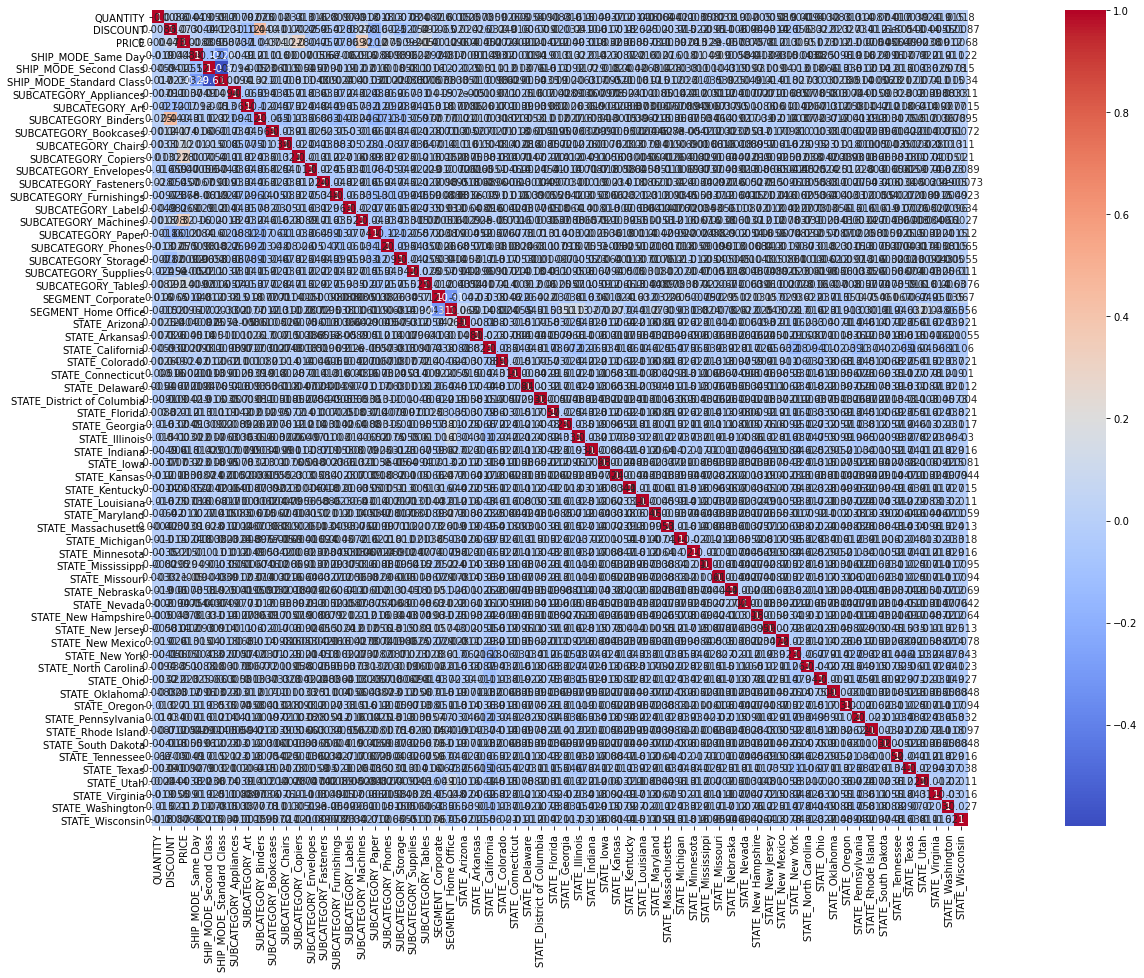

In [16]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize = (35,15))
sns.heatmap(regression_data.corr(), square = True, annot = True, cmap = "coolwarm")

In [18]:
corr = regression_data.corr()['QUANTITY'].sort_values(ascending = False, key = abs)
corr

QUANTITY                 1.000000
SUBCATEGORY_Fasteners    0.028283
SUBCATEGORY_Binders      0.025336
SUBCATEGORY_Supplies    -0.024045
STATE_New Mexico         0.019438
                           ...   
SEGMENT_Home Office     -0.001505
STATE_Kentucky          -0.001353
SUBCATEGORY_Bookcases    0.001198
PRICE                    0.000435
STATE_Massachusetts      0.000419
Name: QUANTITY, Length: 64, dtype: float64

In [19]:
# OLS
import statsmodels.api as sm

y = np.log(y)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.177
Date:                Sun, 26 Sep 2021   Prob (F-statistic):              0.160
Time:                        10:21:38   Log-Likelihood:                -8803.1
No. Observations:                9994   AIC:                         1.773e+04
Df Residuals:                    9930   BIC:                         1.820e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Group by

In [20]:
data.head()

ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE       SHIP_MODE CUSTOMER_ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

        PRODUCT_ID     SALES  QUANTITY  DISCOUNT    PROFIT  DISCOUNTED_PRICE  \
0  FUR-BO-10001798  261.9600         2      0.00   41.9136          130.9800   
1  FUR-CH-10000454  731.9400         3      0.00  219.5820          243.9800   
2  OFF-LA-10000240   14.6200         2      0.00    6.8714            7.3100   
3  FUR-TA-10000577  957.5775         5      0.45 -383.0310          191.5155   
4  OFF-ST-10000760   22.3680         2      0.20    2.5164           11.1840   

    PRICE         CATEGORY SUBCATEGORY  \
0  130.98        Furniture   Bookcases   
1  243.98        Furniture      Chairs   
2    7.31  Office Supplies      Labels   
3  348.21        Furniture      Tables   
4   13.98  Office Supplies     Storage   

                                        PRODUCT_NAME    CUSTOMER_NAME  \
0                  Bush Somerset Collection Bookcase      Claire Gute   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Claire Gute   
2  Self-Adhesive Address Labels for Typewriters b...  Darrin Van Huff   
3      Bretford CR4500 Series Slim Rectangular Table   Sean O'Donnell   
4                      Eldon Fold N Roll Cart System   Sean O'Donnell   

     SEGMENT        COUNTRY             CITY       STATE  POSTAL_CODE REGION  
0   Consumer  United States        Henderson    Kentucky        42420  South  
1   Consumer  United States        Henderson    Kentucky        42420  South  
2  Corporate  United States      Los Angeles  California        90036   West  
3   Consumer  United States  Fort Lauderdale     Florida        33311  South  
4   Consumer  United States  Fort Lauderdale     Florida        33311  South

In [21]:
grouped_data = data.groupby([pd.Grouper('SEGMENT'),
                            pd.Grouper('SUBCATEGORY'),
                            pd.Grouper('SHIP_MODE')]).agg(AVG_DISCOUNT=('DISCOUNT','mean'),
                                                        SUM_QUANTITY=('QUANTITY','sum'))
grouped_data.head()

AVG_DISCOUNT  SUM_QUANTITY
SEGMENT  SUBCATEGORY SHIP_MODE                                 
Consumer Accessories First Class         0.063768           256
                     Same Day            0.086667           115
                     Second Class        0.084337           332
                     Standard Class      0.092920           875
         Appliances  First Class         0.106667           153

In [22]:
grouped_data = grouped_data.reset_index()
grouped_data.head(10)

SEGMENT  SUBCATEGORY       SHIP_MODE  AVG_DISCOUNT  SUM_QUANTITY
0  Consumer  Accessories     First Class      0.063768           256
1  Consumer  Accessories        Same Day      0.086667           115
2  Consumer  Accessories    Second Class      0.084337           332
3  Consumer  Accessories  Standard Class      0.092920           875
4  Consumer   Appliances     First Class      0.106667           153
5  Consumer   Appliances        Same Day      0.158333            41
6  Consumer   Appliances    Second Class      0.194872           152
7  Consumer   Appliances  Standard Class      0.202027           562
8  Consumer          Art     First Class      0.088525           217
9  Consumer          Art        Same Day      0.083333            79

In [23]:
# Consumer Machines
Consumer_Machines = grouped_data[(grouped_data['SEGMENT'] == 'Consumer') & (grouped_data['SUBCATEGORY'] == 'Machines')]
Consumer_Machines

SEGMENT SUBCATEGORY       SHIP_MODE  AVG_DISCOUNT  SUM_QUANTITY
44  Consumer    Machines     First Class      0.633333            22
45  Consumer    Machines        Same Day      0.233333             9
46  Consumer    Machines    Second Class      0.160000            18
47  Consumer    Machines  Standard Class      0.240000           168

# Discount with Max Quantity

In [24]:
# get the rows which have the max value in groups using groupby
# which ship mode has largest quantity
best_discount = grouped_data.loc[grouped_data.groupby(['SEGMENT', 'SUBCATEGORY'])['SUM_QUANTITY'].idxmax()]
best_discount.head()

SEGMENT  SUBCATEGORY       SHIP_MODE  AVG_DISCOUNT  SUM_QUANTITY
3   Consumer  Accessories  Standard Class      0.092920           875
7   Consumer   Appliances  Standard Class      0.202027           562
11  Consumer          Art  Standard Class      0.080469          1005
15  Consumer      Binders  Standard Class      0.390397          1889
19  Consumer    Bookcases  Standard Class      0.220263           313

In [25]:
best_discount['SHIP_MODE'].value_counts()

Standard Class    51
Name: SHIP_MODE, dtype: int64

In [26]:
best_discount.rename(columns = {'AVG_DISCOUNT': 'BEST_DISCOUNT'}, inplace=True)
best_discount.head()

SEGMENT  SUBCATEGORY       SHIP_MODE  BEST_DISCOUNT  SUM_QUANTITY
3   Consumer  Accessories  Standard Class       0.092920           875
7   Consumer   Appliances  Standard Class       0.202027           562
11  Consumer          Art  Standard Class       0.080469          1005
15  Consumer      Binders  Standard Class       0.390397          1889
19  Consumer    Bookcases  Standard Class       0.220263           313

# Comparison

In [55]:
data_best_discount = pd.merge(data, best_discount, on = ['SEGMENT', 'SUBCATEGORY'], how = 'left')
data_best_discount.head()

ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE     SHIP_MODE_x CUSTOMER_ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

        PRODUCT_ID     SALES  QUANTITY  DISCOUNT    PROFIT  DISCOUNTED_PRICE  \
0  FUR-BO-10001798  261.9600         2      0.00   41.9136          130.9800   
1  FUR-CH-10000454  731.9400         3      0.00  219.5820          243.9800   
2  OFF-LA-10000240   14.6200         2      0.00    6.8714            7.3100   
3  FUR-TA-10000577  957.5775         5      0.45 -383.0310          191.5155   
4  OFF-ST-10000760   22.3680         2      0.20    2.5164           11.1840   

    PRICE         CATEGORY SUBCATEGORY  \
0  130.98        Furniture   Bookcases   
1  243.98        Furniture      Chairs   
2    7.31  Office Supplies      Labels   
3  348.21        Furniture      Tables   
4   13.98  Office Supplies     Storage   

                                        PRODUCT_NAME    CUSTOMER_NAME  \
0                  Bush Somerset Collection Bookcase      Claire Gute   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Claire Gute   
2  Self-Adhesive Address Labels for Typewriters b...  Darrin Van Huff   
3      Bretford CR4500 Series Slim Rectangular Table   Sean O'Donnell   
4                      Eldon Fold N Roll Cart System   Sean O'Donnell   

     SEGMENT        COUNTRY             CITY       STATE  POSTAL_CODE REGION  \
0   Consumer  United States        Henderson    Kentucky        42420  South   
1   Consumer  United States        Henderson    Kentucky        42420  South   
2  Corporate  United States      Los Angeles  California        90036   West   
3   Consumer  United States  Fort Lauderdale     Florida        33311  South   
4   Consumer  United States  Fort Lauderdale     Florida        33311  South   

      SHIP_MODE_y  BEST_DISCOUNT  SUM_QUANTITY  
0  Standard Class       0.220263           313  
1  Standard Class       0.174872           725  
2  Standard Class       0.094737           214  
3  Standard Class       0.269355           340  
4  Standard Class       0.081784           964

In [56]:
data_best_discount['NEW_PRICE'] = data_best_discount['PRICE']*(1-data_best_discount['BEST_DISCOUNT'])
data_best_discount['NEW_SALES'] = data_best_discount['NEW_PRICE']*data_best_discount['QUANTITY']  # assume same quantity
data_best_discount.head()

ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE     SHIP_MODE_x CUSTOMER_ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

        PRODUCT_ID     SALES  QUANTITY  DISCOUNT    PROFIT  DISCOUNTED_PRICE  \
0  FUR-BO-10001798  261.9600         2      0.00   41.9136          130.9800   
1  FUR-CH-10000454  731.9400         3      0.00  219.5820          243.9800   
2  OFF-LA-10000240   14.6200         2      0.00    6.8714            7.3100   
3  FUR-TA-10000577  957.5775         5      0.45 -383.0310          191.5155   
4  OFF-ST-10000760   22.3680         2      0.20    2.5164           11.1840   

    PRICE         CATEGORY SUBCATEGORY  \
0  130.98        Furniture   Bookcases   
1  243.98        Furniture      Chairs   
2    7.31  Office Supplies      Labels   
3  348.21        Furniture      Tables   
4   13.98  Office Supplies     Storage   

                                        PRODUCT_NAME    CUSTOMER_NAME  \
0                  Bush Somerset Collection Bookcase      Claire Gute   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Claire Gute   
2  Self-Adhesive Address Labels for Typewriters b...  Darrin Van Huff   
3      Bretford CR4500 Series Slim Rectangular Table   Sean O'Donnell   
4                      Eldon Fold N Roll Cart System   Sean O'Donnell   

     SEGMENT        COUNTRY             CITY       STATE  POSTAL_CODE REGION  \
0   Consumer  United States        Henderson    Kentucky        42420  South   
1   Consumer  United States        Henderson    Kentucky        42420  South   
2  Corporate  United States      Los Angeles  California        90036   West   
3   Consumer  United States  Fort Lauderdale     Florida        33311  South   
4   Consumer  United States  Fort Lauderdale     Florida        33311  South   

      SHIP_MODE_y  BEST_DISCOUNT  SUM_QUANTITY   NEW_PRICE    NEW_SALES  
0  Standard Class       0.220263           313  102.129932   204.259863  
1  Standard Class       0.174872           725  201.314779   603.944338  
2  Standard Class       0.094737           214    6.617474    13.234947  
3  Standard Class       0.269355           340  254.417952  1272.089758  
4  Standard Class       0.081784           964   12.836654    25.673309

In [57]:
# old sales
old_sales = data_best_discount['SALES'].sum()
old_sales

2297200.8603000003

In [58]:
# new sales
new_sales = data_best_discount['NEW_SALES'].sum()
new_sales

2308832.81565756

In [59]:
# difference
new_sales - old_sales

11631.955357559491

In [31]:
best_discount.drop(columns = ['SHIP_MODE', 'SUM_QUANTITY'], inplace = True)
best_discount.head()

SEGMENT  SUBCATEGORY  BEST_DISCOUNT
3   Consumer  Accessories       0.092920
7   Consumer   Appliances       0.202027
11  Consumer          Art       0.080469
15  Consumer      Binders       0.390397
19  Consumer    Bookcases       0.220263

In [32]:
# best_discount.to_csv('best_discount.csv', index = False)

## Consumer Machines

In [60]:
# Consumer Machines
Consumer_Machines = data_best_discount[(data_best_discount['SEGMENT'] == 'Consumer') & (data_best_discount['SUBCATEGORY'] == 'Machines')]
Consumer_Machines.head()

ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE     SHIP_MODE_x  \
165      166  CA-2014-139892    9/8/2014   9/12/2014  Standard Class   
223      224  CA-2015-169397  12/24/2015  12/27/2015     First Class   
1022    1023  CA-2015-124450   4/27/2015    5/3/2015  Standard Class   
1085    1086  US-2016-143819    3/1/2016    3/5/2016  Standard Class   
1144    1145  CA-2014-146969   9/29/2014   10/3/2014  Standard Class   

     CUSTOMER_ID       PRODUCT_ID     SALES  QUANTITY  DISCOUNT     PROFIT  \
165     BM-11140  TEC-MA-10000822  8159.952         8       0.4 -1359.9920   
223     JB-15925  TEC-MA-10001148   479.988         4       0.7  -383.9904   
1022    GT-14710  TEC-MA-10004212  1379.920         8       0.0   648.5624   
1085    KD-16270  TEC-MA-10003979  4899.930         7       0.0  2400.9657   
1144    AP-10915  TEC-MA-10004241   686.320         2       0.2   223.0540   

      DISCOUNTED_PRICE    PRICE    CATEGORY SUBCATEGORY  \
165           1019.994  1699.99  Technology    Machines   
223            119.997   399.99  Technology    Machines   
1022           172.490   172.49  Technology    Machines   
1085           699.990   699.99  Technology    Machines   
1144           343.160   428.95  Technology    Machines   

                                         PRODUCT_NAME   CUSTOMER_NAME  \
165         Lexmark MX611dhe Monochrome Laser Printer    Becky Martin   
223      Swingline SM12-08 MicroCut Jam Free Shredder  Joni Blumstein   
1022                   Cisco SPA525G2 5-Line IP Phone       Greg Tran   
1085                Ativa V4110MDD Micro-Cut Shredder   Karen Daniels   
1144  Star Micronics TSP800 TSP847IIU Receipt Printer  Arthur Prichep   

       SEGMENT        COUNTRY         CITY     STATE  POSTAL_CODE   REGION  \
165   Consumer  United States  San Antonio     Texas        78207  Central   
223   Consumer  United States       Dublin      Ohio        43017     East   
1022  Consumer  United States      Houston     Texas        77070  Central   
1085  Consumer  United States  Springfield  Virginia        22153    South   
1144  Consumer  United States   Palm Coast   Florida        32137    South   

         SHIP_MODE_y  BEST_DISCOUNT  SUM_QUANTITY  NEW_PRICE   NEW_SALES  
165   Standard Class           0.24           168  1291.9924  10335.9392  
223   Standard Class           0.24           168   303.9924   1215.9696  
1022  Standard Class           0.24           168   131.0924   1048.7392  
1085  Standard Class           0.24           168   531.9924   3723.9468  
1144  Standard Class           0.24           168   326.0020    652.0040

In [61]:
# new sales
new_sales = Consumer_Machines['NEW_SALES'].sum()
new_sales

87692.5088

In [62]:
# old sales
old_sales = Consumer_Machines['SALES'].sum()
old_sales

79542.825

In [63]:
# difference
new_sales - old_sales

8149.683799999999

# Sales Difference

In [64]:
sales_comparison = data_best_discount.groupby([pd.Grouper('SEGMENT'),
                                                pd.Grouper('SUBCATEGORY')]).agg(SUM_SALES=('SALES','sum'),
                                                                               SUM_NEW_SALES=('NEW_SALES','sum'))
sales_comparison.head()

SUM_SALES  SUM_NEW_SALES
SEGMENT  SUBCATEGORY                           
Consumer Accessories   87105.238   85186.099115
         Appliances    52819.581   51877.411953
         Art           14251.930   14192.900477
         Binders      118161.009  116971.274154
         Bookcases     68632.729   70671.487671

In [65]:
sales_comparison = sales_comparison.reset_index()
sales_comparison.head()

SEGMENT  SUBCATEGORY   SUM_SALES  SUM_NEW_SALES
0  Consumer  Accessories   87105.238   85186.099115
1  Consumer   Appliances   52819.581   51877.411953
2  Consumer          Art   14251.930   14192.900477
3  Consumer      Binders  118161.009  116971.274154
4  Consumer    Bookcases   68632.729   70671.487671

In [66]:
# new - old
sales_comparison['SALES_DIFFERENCE'] = sales_comparison['SUM_NEW_SALES'] - sales_comparison['SUM_SALES']
sales_comparison.head()

SEGMENT  SUBCATEGORY   SUM_SALES  SUM_NEW_SALES  SALES_DIFFERENCE
0  Consumer  Accessories   87105.238   85186.099115      -1919.138885
1  Consumer   Appliances   52819.581   51877.411953       -942.169047
2  Consumer          Art   14251.930   14192.900477        -59.029523
3  Consumer      Binders  118161.009  116971.274154      -1189.734846
4  Consumer    Bookcases   68632.729   70671.487671       2038.758671

In [67]:
# Consumer Machines
Consumer_Machines = sales_comparison[(sales_comparison['SEGMENT'] == 'Consumer') & (sales_comparison['SUBCATEGORY'] == 'Machines')]
Consumer_Machines

SEGMENT SUBCATEGORY  SUM_SALES  SUM_NEW_SALES  SALES_DIFFERENCE
11  Consumer    Machines  79542.825     87692.5088         8149.6838

In [40]:
sales_comparison.shape

(51, 5)

In [68]:
sales_comparison.iloc[:,-1].agg(lambda x: sum(x < 0))

27

In [69]:
sales_comparison.iloc[:,-1].agg(lambda x: sum(x > 0))

24

In [52]:
sales_comparison['SALES_DIFFERENCE'].agg(lambda x: sum(x > 0))

24

In [47]:
less_than_0 = sales_comparison[sales_comparison['SALES_DIFFERENCE'] < 0]
less_than_0.head()

SEGMENT  SUBCATEGORY   SUM_SALES  SUM_NEW_SALES  SALES_DIFFERENCE
0  Consumer  Accessories   87105.238   85186.099115      -1919.138885
1  Consumer   Appliances   52819.581   51877.411953       -942.169047
2  Consumer          Art   14251.930   14192.900477        -59.029523
3  Consumer      Binders  118161.009  116971.274154      -1189.734846
5  Consumer       Chairs  172862.742  171502.699405      -1360.042595

# Optimize Discount

In [46]:
best_discount.head()

SEGMENT  SUBCATEGORY       SHIP_MODE  BEST_DISCOUNT  SUM_QUANTITY
3   Consumer  Accessories  Standard Class       0.092920           875
7   Consumer   Appliances  Standard Class       0.202027           562
11  Consumer          Art  Standard Class       0.080469          1005
15  Consumer      Binders  Standard Class       0.390397          1889
19  Consumer    Bookcases  Standard Class       0.220263           313

In [45]:
best_discount.shape

(51, 5)

In [70]:
sales_comparison_merged = pd.merge(best_discount, sales_comparison, on = ['SEGMENT', 'SUBCATEGORY'], how = 'left')
sales_comparison_merged.head()

SEGMENT  SUBCATEGORY       SHIP_MODE  BEST_DISCOUNT  SUM_QUANTITY  \
0  Consumer  Accessories  Standard Class       0.092920           875   
1  Consumer   Appliances  Standard Class       0.202027           562   
2  Consumer          Art  Standard Class       0.080469          1005   
3  Consumer      Binders  Standard Class       0.390397          1889   
4  Consumer    Bookcases  Standard Class       0.220263           313   

    SUM_SALES  SUM_NEW_SALES  SALES_DIFFERENCE  
0   87105.238   85186.099115      -1919.138885  
1   52819.581   51877.411953       -942.169047  
2   14251.930   14192.900477        -59.029523  
3  118161.009  116971.274154      -1189.734846  
4   68632.729   70671.487671       2038.758671

In [71]:
sales_comparison_merged.iloc[:,-1].agg(lambda x: sum(x < 0))

27

In [50]:
sales_comparison_merged.shape

(51, 8)

In [ ]:
# if sales difference > 0, use best discount
# otherwise use original discount

In [72]:
grouped_data.head()

SEGMENT  SUBCATEGORY       SHIP_MODE  AVG_DISCOUNT  SUM_QUANTITY
0  Consumer  Accessories     First Class      0.063768           256
1  Consumer  Accessories        Same Day      0.086667           115
2  Consumer  Accessories    Second Class      0.084337           332
3  Consumer  Accessories  Standard Class      0.092920           875
4  Consumer   Appliances     First Class      0.106667           153

In [73]:
grouped_data.shape

(204, 5)

In [75]:
sales_comparison_merged.head()

SEGMENT  SUBCATEGORY       SHIP_MODE  BEST_DISCOUNT  SUM_QUANTITY  \
0  Consumer  Accessories  Standard Class       0.092920           875   
1  Consumer   Appliances  Standard Class       0.202027           562   
2  Consumer          Art  Standard Class       0.080469          1005   
3  Consumer      Binders  Standard Class       0.390397          1889   
4  Consumer    Bookcases  Standard Class       0.220263           313   

    SUM_SALES  SUM_NEW_SALES  SALES_DIFFERENCE  
0   87105.238   85186.099115      -1919.138885  
1   52819.581   51877.411953       -942.169047  
2   14251.930   14192.900477        -59.029523  
3  118161.009  116971.274154      -1189.734846  
4   68632.729   70671.487671       2038.758671

In [76]:
sales_comparison_merged.shape

(51, 8)

In [77]:
sales_comparison_best_discount = sales_comparison_merged[['SEGMENT','SUBCATEGORY','BEST_DISCOUNT','SALES_DIFFERENCE']]
sales_comparison_best_discount.head()

SEGMENT  SUBCATEGORY  BEST_DISCOUNT  SALES_DIFFERENCE
0  Consumer  Accessories       0.092920      -1919.138885
1  Consumer   Appliances       0.202027       -942.169047
2  Consumer          Art       0.080469        -59.029523
3  Consumer      Binders       0.390397      -1189.734846
4  Consumer    Bookcases       0.220263       2038.758671

In [78]:
greater_than_0 = sales_comparison_best_discount[sales_comparison_best_discount['SALES_DIFFERENCE'] > 0]
greater_than_0.head()

SEGMENT  SUBCATEGORY  BEST_DISCOUNT  SALES_DIFFERENCE
4   Consumer    Bookcases       0.220263       2038.758671
7   Consumer    Envelopes       0.081928         24.472048
9   Consumer  Furnishings       0.132862         45.428106
11  Consumer     Machines       0.240000       8149.683800
12  Consumer        Paper       0.071574        450.759376

In [79]:
greater_than_0.shape

(24, 4)

In [80]:
grouped_data_greater_than_0 = pd.merge(grouped_data, greater_than_0, on = ['SEGMENT', 'SUBCATEGORY'], how = 'left')
grouped_data_greater_than_0.head()

SEGMENT  SUBCATEGORY       SHIP_MODE  AVG_DISCOUNT  SUM_QUANTITY  \
0  Consumer  Accessories     First Class      0.063768           256   
1  Consumer  Accessories        Same Day      0.086667           115   
2  Consumer  Accessories    Second Class      0.084337           332   
3  Consumer  Accessories  Standard Class      0.092920           875   
4  Consumer   Appliances     First Class      0.106667           153   

   BEST_DISCOUNT  SALES_DIFFERENCE  
0            NaN               NaN  
1            NaN               NaN  
2            NaN               NaN  
3            NaN               NaN  
4            NaN               NaN

In [81]:
grouped_data_greater_than_0[grouped_data_greater_than_0['BEST_DISCOUNT'].notnull()]

SEGMENT SUBCATEGORY       SHIP_MODE  AVG_DISCOUNT  SUM_QUANTITY  \
16      Consumer   Bookcases     First Class      0.219615            88   
17      Consumer   Bookcases        Same Day      0.175000             2   
18      Consumer   Bookcases    Second Class      0.230000            93   
19      Consumer   Bookcases  Standard Class      0.220263           313   
28      Consumer   Envelopes     First Class      0.100000            46   
..           ...         ...             ...           ...           ...   
183  Home Office    Machines  Standard Class      0.275000            44   
188  Home Office      Phones     First Class      0.141935           111   
189  Home Office      Phones        Same Day      0.133333            39   
190  Home Office      Phones    Second Class      0.138889           146   
191  Home Office      Phones  Standard Class      0.163218           305   

     BEST_DISCOUNT  SALES_DIFFERENCE  
16        0.220263       2038.758671  
17        0.220263       2038.758671  
18        0.220263       2038.758671  
19        0.220263       2038.758671  
28        0.081928         24.472048  
..             ...               ...  
183       0.275000      12277.136750  
188       0.163218         28.506069  
189       0.163218         28.506069  
190       0.163218         28.506069  
191       0.163218         28.506069  

[96 rows x 7 columns]

In [83]:
# if sales difference > 0, use best disount (same discount rate for different ship mode)
# otherwise use original discount (different discount rate for different ship mode)
grouped_data_greater_than_0['FINAL_BEST_DISCOUNT'] = grouped_data_greater_than_0['BEST_DISCOUNT'].fillna(grouped_data_greater_than_0['AVG_DISCOUNT'])
grouped_data_greater_than_0.head()

SEGMENT  SUBCATEGORY       SHIP_MODE  AVG_DISCOUNT  SUM_QUANTITY  \
0  Consumer  Accessories     First Class      0.063768           256   
1  Consumer  Accessories        Same Day      0.086667           115   
2  Consumer  Accessories    Second Class      0.084337           332   
3  Consumer  Accessories  Standard Class      0.092920           875   
4  Consumer   Appliances     First Class      0.106667           153   

   BEST_DISCOUNT  SALES_DIFFERENCE  FINAL_BEST_DISCOUNT  
0            NaN               NaN             0.063768  
1            NaN               NaN             0.086667  
2            NaN               NaN             0.084337  
3            NaN               NaN             0.092920  
4            NaN               NaN             0.106667

In [91]:
grouped_data_greater_than_0.loc[16:19, :]

SEGMENT SUBCATEGORY       SHIP_MODE  AVG_DISCOUNT  SUM_QUANTITY  \
16  Consumer   Bookcases     First Class      0.219615            88   
17  Consumer   Bookcases        Same Day      0.175000             2   
18  Consumer   Bookcases    Second Class      0.230000            93   
19  Consumer   Bookcases  Standard Class      0.220263           313   

    BEST_DISCOUNT  SALES_DIFFERENCE  FINAL_BEST_DISCOUNT  
16       0.220263       2038.758671             0.220263  
17       0.220263       2038.758671             0.220263  
18       0.220263       2038.758671             0.220263  
19       0.220263       2038.758671             0.220263

In [92]:
final_best_discount = grouped_data_greater_than_0[['SEGMENT','SUBCATEGORY','SHIP_MODE','FINAL_BEST_DISCOUNT']]
final_best_discount.head()

SEGMENT  SUBCATEGORY       SHIP_MODE  FINAL_BEST_DISCOUNT
0  Consumer  Accessories     First Class             0.063768
1  Consumer  Accessories        Same Day             0.086667
2  Consumer  Accessories    Second Class             0.084337
3  Consumer  Accessories  Standard Class             0.092920
4  Consumer   Appliances     First Class             0.106667

In [93]:
data_final_best_discount = pd.merge(data, final_best_discount, on = ['SEGMENT', 'SUBCATEGORY', 'SHIP_MODE'], how = 'left')
data_final_best_discount.head()

ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE       SHIP_MODE CUSTOMER_ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

        PRODUCT_ID     SALES  QUANTITY  DISCOUNT    PROFIT  DISCOUNTED_PRICE  \
0  FUR-BO-10001798  261.9600         2      0.00   41.9136          130.9800   
1  FUR-CH-10000454  731.9400         3      0.00  219.5820          243.9800   
2  OFF-LA-10000240   14.6200         2      0.00    6.8714            7.3100   
3  FUR-TA-10000577  957.5775         5      0.45 -383.0310          191.5155   
4  OFF-ST-10000760   22.3680         2      0.20    2.5164           11.1840   

    PRICE         CATEGORY SUBCATEGORY  \
0  130.98        Furniture   Bookcases   
1  243.98        Furniture      Chairs   
2    7.31  Office Supplies      Labels   
3  348.21        Furniture      Tables   
4   13.98  Office Supplies     Storage   

                                        PRODUCT_NAME    CUSTOMER_NAME  \
0                  Bush Somerset Collection Bookcase      Claire Gute   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Claire Gute   
2  Self-Adhesive Address Labels for Typewriters b...  Darrin Van Huff   
3      Bretford CR4500 Series Slim Rectangular Table   Sean O'Donnell   
4                      Eldon Fold N Roll Cart System   Sean O'Donnell   

     SEGMENT        COUNTRY             CITY       STATE  POSTAL_CODE REGION  \
0   Consumer  United States        Henderson    Kentucky        42420  South   
1   Consumer  United States        Henderson    Kentucky        42420  South   
2  Corporate  United States      Los Angeles  California        90036   West   
3   Consumer  United States  Fort Lauderdale     Florida        33311  South   
4   Consumer  United States  Fort Lauderdale     Florida        33311  South   

   FINAL_BEST_DISCOUNT  
0             0.220263  
1             0.158904  
2             0.080000  
3             0.269355  
4             0.081784

In [94]:
data_final_best_discount['NEW_PRICE'] = data_final_best_discount['PRICE']*(1-data_final_best_discount['FINAL_BEST_DISCOUNT'])
data_final_best_discount['NEW_SALES'] = data_final_best_discount['NEW_PRICE']*data_final_best_discount['QUANTITY']  # assume same quantity
data_final_best_discount.head()

ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE       SHIP_MODE CUSTOMER_ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

        PRODUCT_ID     SALES  QUANTITY  DISCOUNT    PROFIT  DISCOUNTED_PRICE  \
0  FUR-BO-10001798  261.9600         2      0.00   41.9136          130.9800   
1  FUR-CH-10000454  731.9400         3      0.00  219.5820          243.9800   
2  OFF-LA-10000240   14.6200         2      0.00    6.8714            7.3100   
3  FUR-TA-10000577  957.5775         5      0.45 -383.0310          191.5155   
4  OFF-ST-10000760   22.3680         2      0.20    2.5164           11.1840   

    PRICE         CATEGORY SUBCATEGORY  \
0  130.98        Furniture   Bookcases   
1  243.98        Furniture      Chairs   
2    7.31  Office Supplies      Labels   
3  348.21        Furniture      Tables   
4   13.98  Office Supplies     Storage   

                                        PRODUCT_NAME    CUSTOMER_NAME  \
0                  Bush Somerset Collection Bookcase      Claire Gute   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Claire Gute   
2  Self-Adhesive Address Labels for Typewriters b...  Darrin Van Huff   
3      Bretford CR4500 Series Slim Rectangular Table   Sean O'Donnell   
4                      Eldon Fold N Roll Cart System   Sean O'Donnell   

     SEGMENT        COUNTRY             CITY       STATE  POSTAL_CODE REGION  \
0   Consumer  United States        Henderson    Kentucky        42420  South   
1   Consumer  United States        Henderson    Kentucky        42420  South   
2  Corporate  United States      Los Angeles  California        90036   West   
3   Consumer  United States  Fort Lauderdale     Florida        33311  South   
4   Consumer  United States  Fort Lauderdale     Florida        33311  South   

   FINAL_BEST_DISCOUNT   NEW_PRICE    NEW_SALES  
0             0.220263  102.129932   204.259863  
1             0.158904  205.210575   615.631726  
2             0.080000    6.725200    13.450400  
3             0.269355  254.417952  1272.089758  
4             0.081784   12.836654    25.673309

In [95]:
# old sales
old_sales = data_final_best_discount['SALES'].sum()
old_sales

2297200.8603000003

In [96]:
# new sales
new_sales = data_final_best_discount['NEW_SALES'].sum()
new_sales

2315909.5860512448

In [97]:
# difference
new_sales - old_sales

18708.725751244463